In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
filename = 'NBAShot Locations1997-2020.csv'
df = pd.read_csv(filename)

In [3]:
length = len(df)
print(f"The dataframe has {length} rows.")

The dataframe has 4729512 rows.


In [4]:
df.tail()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
4729507,41800406,366,2738,Andre Iguodala,1610612744,Golden State Warriors,3,7,51,Pullup Jump shot,...,Right Side Center(RC),16-24 ft.,17,135,107,0,20190613,GSW,TOR,Playoffs
4729508,41800406,392,2738,Andre Iguodala,1610612744,Golden State Warriors,3,6,8,Jump Shot,...,Right Side(R),24+ ft.,23,228,37,1,20190613,GSW,TOR,Playoffs
4729509,41800406,404,2738,Andre Iguodala,1610612744,Golden State Warriors,3,4,41,Floating Jump shot,...,Center(C),Less Than 8 ft.,4,38,21,1,20190613,GSW,TOR,Playoffs
4729510,41800406,468,2738,Andre Iguodala,1610612744,Golden State Warriors,3,1,7,Jump Shot,...,Right Side Center(RC),24+ ft.,26,156,217,1,20190613,GSW,TOR,Playoffs
4729511,41800406,584,2738,Andre Iguodala,1610612744,Golden State Warriors,4,4,50,Pullup Jump shot,...,Right Side Center(RC),16-24 ft.,18,102,153,1,20190613,GSW,TOR,Playoffs


DATA CLEANING AND PROCESSING

In [5]:
min_date = df['Game Date'].min()
max_date = df['Game Date'].max()
print(min_date)
print(max_date)

19971031
20200311


In [6]:
df = df.dropna()

In [7]:
teams = df['Team Name'].unique()
teams

array(['Washington Wizards', 'Utah Jazz', 'San Antonio Spurs',
       'Atlanta Hawks', 'Toronto Raptors', 'Portland Trail Blazers',
       'New York Knicks', 'Houston Rockets', 'Phoenix Suns', 'Miami Heat',
       'Cleveland Cavaliers', 'Milwaukee Bucks', 'Los Angeles Clippers',
       'Philadelphia 76ers', 'Denver Nuggets', 'Golden State Warriors',
       'Orlando Magic', 'Dallas Mavericks', 'Seattle SuperSonics',
       'Sacramento Kings', 'Los Angeles Lakers', 'Vancouver Grizzlies',
       'Charlotte Hornets', 'New Jersey Nets', 'Chicago Bulls',
       'Indiana Pacers', 'Boston Celtics', 'Detroit Pistons',
       'Minnesota Timberwolves', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers'],
      dtype=object)

In [8]:
df['Shot Made Flag'] = df['Shot Made Flag'].astype(int)

In [9]:
shot_types = df['Action Type'].unique()
shot_types

array(['Jump Shot', 'Layup Shot', 'Driving Layup Shot', 'Tip Shot',
       'Running Jump Shot', 'Slam Dunk Shot', 'Dunk Shot',
       'Driving Dunk Shot', 'Hook Shot', 'No Shot',
       'Turnaround Jump Shot', 'Reverse Layup Shot', 'Running Layup Shot',
       'Driving Finger Roll Shot', 'Alley Oop Dunk Shot',
       'Finger Roll Shot', 'Reverse Dunk Shot', 'Running Hook Shot',
       'Running Dunk Shot', 'Turnaround Hook Shot',
       'Running Finger Roll Shot', 'Driving Hook Shot',
       'Running Tip Shot', 'Alley Oop Layup shot',
       'Turnaround Finger Roll Shot', 'Fadeaway Jump Shot',
       'Jump Hook Shot', 'Follow Up Dunk Shot', 'Jump Bank Shot',
       'Hook Bank Shot', 'Driving Finger Roll Layup Shot',
       'Running Finger Roll Layup Shot', 'Floating Jump shot',
       'Putback Dunk Shot', 'Turnaround Fadeaway shot',
       'Running Reverse Layup Shot', 'Putback Layup Shot',
       'Finger Roll Layup Shot', 'Driving Slam Dunk Shot',
       'Driving Reverse Layup Shot', '

In [10]:
season_types = df['Season Type'].unique()
print(season_types)

['Regular Season' 'Playoffs']


In [11]:
shot_type_map = {
    'Jump Shot': 'Jump Shot',
    'Layup Shot': 'Layup',
    'Driving Layup Shot': 'Layup',
    'Tip Shot': 'No Shot',  # updated mapping for Tip Shot
    'Running Jump Shot': 'Jump Shot',
    'Slam Dunk Shot': 'No Shot',  # updated mapping for Dunk Shot
    'Dunk Shot': 'No Shot',  # updated mapping for Dunk Shot
    'Driving Dunk Shot': 'No Shot',  # updated mapping for Dunk Shot
    'Hook Shot': 'Hook Shot',
    'No Shot': 'No Shot',
    'Turnaround Jump Shot': 'Jump Shot',
    'Reverse Layup Shot': 'Layup',
    'Running Layup Shot': 'Layup',
    'Driving Finger Roll Shot': 'Layup',
    'Alley Oop Dunk Shot': 'No Shot',  # updated mapping for Alley Oop Dunk Shot
    'Finger Roll Shot': 'Layup',
    'Reverse Dunk Shot': 'No Shot',  # updated mapping for Reverse Dunk Shot
    'Running Hook Shot': 'Hook Shot',
    'Running Dunk Shot': 'No Shot',  # updated mapping for Running Dunk Shot
    'Turnaround Hook Shot': 'Hook Shot',
    'Running Finger Roll Shot': 'Layup',
    'Driving Hook Shot': 'Hook Shot',
    'Running Tip Shot': 'No Shot',  # updated mapping for Running Tip Shot
    'Alley Oop Layup shot': 'Layup',
    'Turnaround Finger Roll Shot': 'Layup',
    'Fadeaway Jump Shot': 'Jump Shot',
    'Jump Hook Shot': 'Hook Shot',
    'Follow Up Dunk Shot': 'No Shot',  # updated mapping for Follow Up Dunk Shot
    'Jump Bank Shot': 'Jump Shot',
    'Hook Bank Shot': 'Hook Shot',
    'Driving Finger Roll Layup Shot': 'Layup',
    'Running Finger Roll Layup Shot': 'Layup',
    'Floating Jump shot': 'Jump Shot',
    'Putback Dunk Shot': 'No Shot',  # updated mapping for Putback Dunk Shot
    'Turnaround Fadeaway shot': 'Jump Shot',
    'Running Reverse Layup Shot': 'Layup',
    'Putback Layup Shot': 'Layup',
    'Finger Roll Layup Shot': 'Layup',
    'Driving Slam Dunk Shot': 'No Shot',  # updated mapping for Driving Slam Dunk Shot
    'Driving Reverse Layup Shot': 'Layup',
    'Pullup Jump shot': 'Jump Shot',
    'Running Bank shot': 'Jump Shot',
    'Step Back Jump shot': 'Jump Shot',
    'Driving Jump shot': 'Jump Shot',
    'Reverse Slam Dunk Shot': 'No Shot',  # updated mapping for Reverse Slam Dunk Shot
    'Driving Bank shot': 'Jump Shot',
    'Putback Slam Dunk Shot': 'No Shot',  # updated mapping for Putback Slam Dunk Shot
    'Driving Bank Hook Shot': 'Hook Shot',
    'Running Slam Dunk Shot': 'No Shot',  # updated mapping for Running Slam Dunk Shot
    'Turnaround Bank shot': 'Jump Shot',
    'Turnaround Bank Hook Shot': 'Hook Shot',
    'Jump Bank Hook Shot': 'Hook Shot',
    'Fadeaway Bank shot': 'Jump Shot',
    'Pullup Bank shot': 'Jump Shot',
    'Putback Reverse Dunk Shot': 'No Shot',
    'Running Bank Hook Shot': 'Hook Shot',
    'Tip Layup Shot': 'Layup',
    'Cutting Dunk Shot': 'No Shot',
    'Cutting Layup Shot': 'Layup',
    'Tip Dunk Shot': 'No Shot',
    'Running Alley Oop Dunk Shot': 'No Shot',
    'Running Alley Oop Layup Shot': 'Layup',
    'Driving Floating Jump Shot': 'Jump Shot',
    'Cutting Finger Roll Layup Shot': 'Layup',
    'Running Pull-Up Jump Shot': 'Jump Shot',
    'Driving Floating Bank Jump Shot' : 'Jump Shot', 
    'Step Back Bank Jump Shot': 'Jump Shot',
    'Turnaround Fadeaway Bank Jump Shot': 'Jump Shot', 
    'Driving Reverse Dunk Shot': 'Jump Shot',
    'Running Reverse Dunk Shot' : 'Jump Shot',
}

In [12]:
df['Action Type'] = df['Action Type'].map(shot_type_map)

In [13]:
df['Game Date'] = pd.to_datetime(df['Game Date'], format='%Y%m%d')
df['year'] = df['Game Date'].dt.year
df['month'] = df['Game Date'].dt.month
df['day'] = df['Game Date'].dt.day

In [14]:
team_wins = df[df['Shot Made Flag'] == 1].groupby('Team Name')['Game ID'].nunique()
team_ranking = team_wins.sort_values(ascending=False)

print(team_ranking[:5])
print("")
player_team_shots_made = df.groupby(['Player Name', 'Team Name'])['Shot Made Flag'].sum().reset_index()
player_team_shots_made = player_team_shots_made.sort_values(by='Shot Made Flag', ascending=False)
print(player_team_shots_made.head(5))

Team Name
San Antonio Spurs     2103
Los Angeles Lakers    2037
Miami Heat            2017
Boston Celtics        2011
Indiana Pacers        1998
Name: Game ID, dtype: int64

        Player Name            Team Name  Shot Made Flag
3510    Kobe Bryant   Los Angeles Lakers           13534
1672  Dirk Nowitzki     Dallas Mavericks           12389
5576     Tim Duncan    San Antonio Spurs           12238
3659   LeBron James  Cleveland Cavaliers            9997
1795    Dwyane Wade           Miami Heat            9260


DATA VISUALIZATIONS AND ANALYSIS

In [15]:
def shooting_trends(player):
  player_data = df[df['Action Type'] != 'No Shot']
  player_shots = player_data.groupby(["year","Action Type"])["Shot Made Flag"].agg(["count", "sum"])
  player_shots["Shooting Percentage"] = player_shots["sum"] / player_shots["count"] * 100
  ax = player_shots["Shooting Percentage"].unstack().plot(kind="bar", figsize=(10, 6), linewidth=2, color=["purple","gray","pink"])

  ax.set_title("Player Shooting Trends: {}".format(player))
  ax.set_xlabel("Season")
  ax.set_ylabel("Shooting Percentage")

  ax.legend(loc="best")
  ax.grid(False)

  # Show the chart
  plt.show()

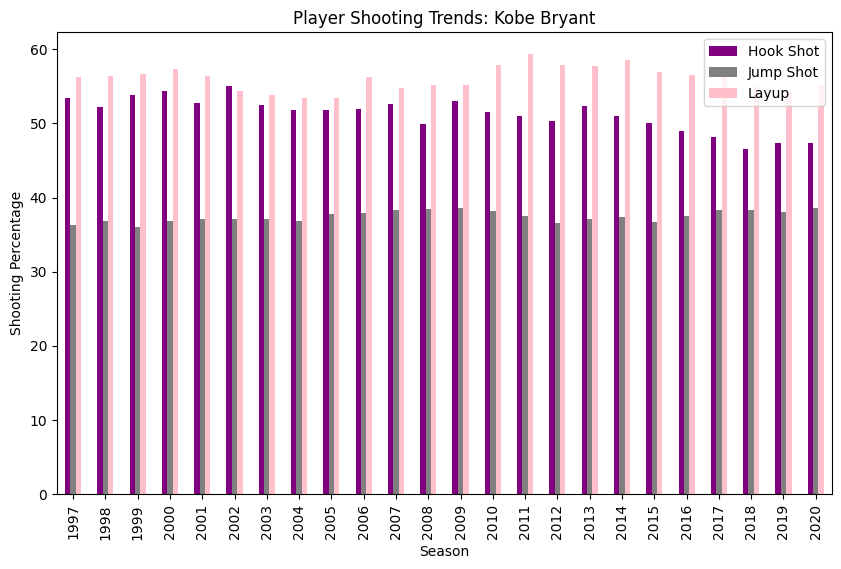

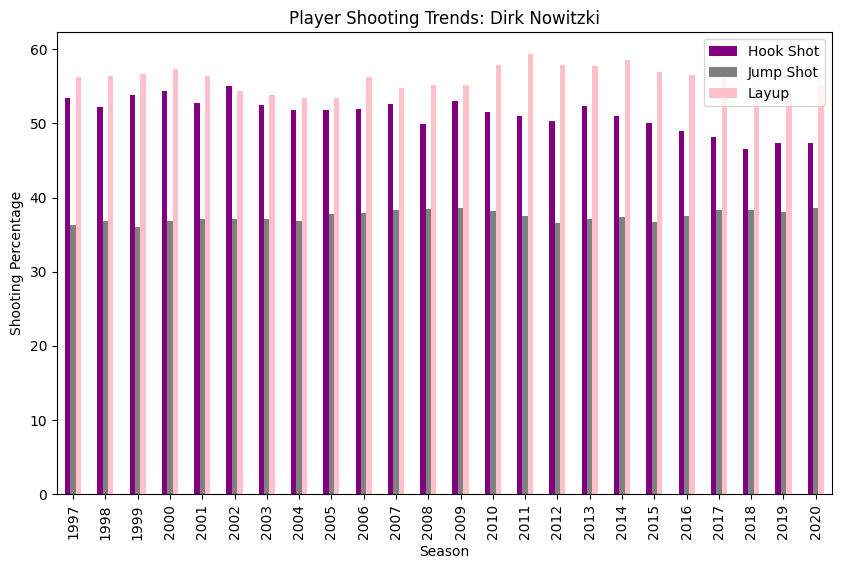

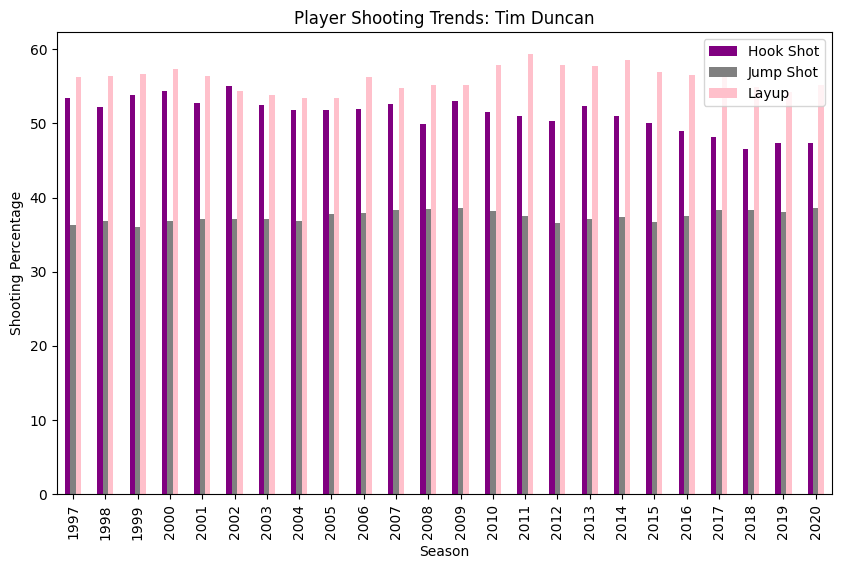

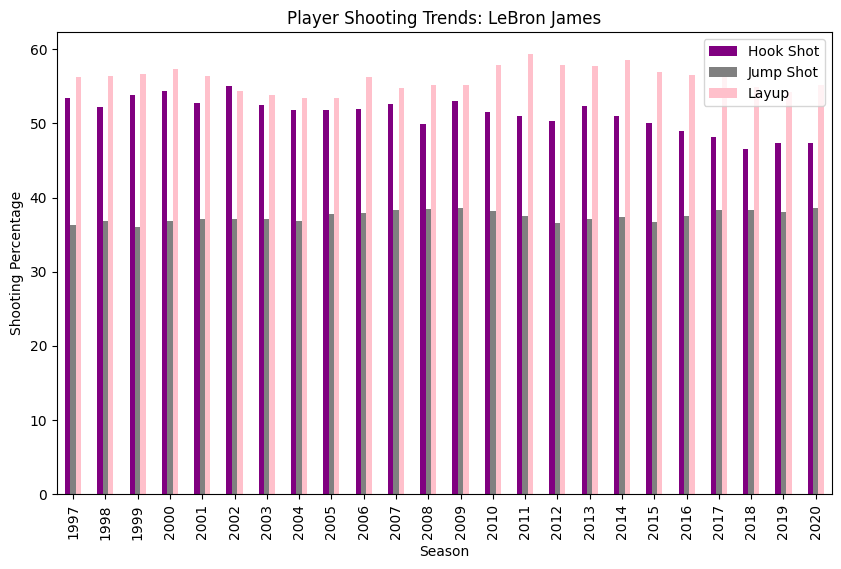

In [16]:
shooting_trends('Kobe Bryant')
shooting_trends('Dirk Nowitzki')
shooting_trends('Tim Duncan')
shooting_trends('LeBron James')

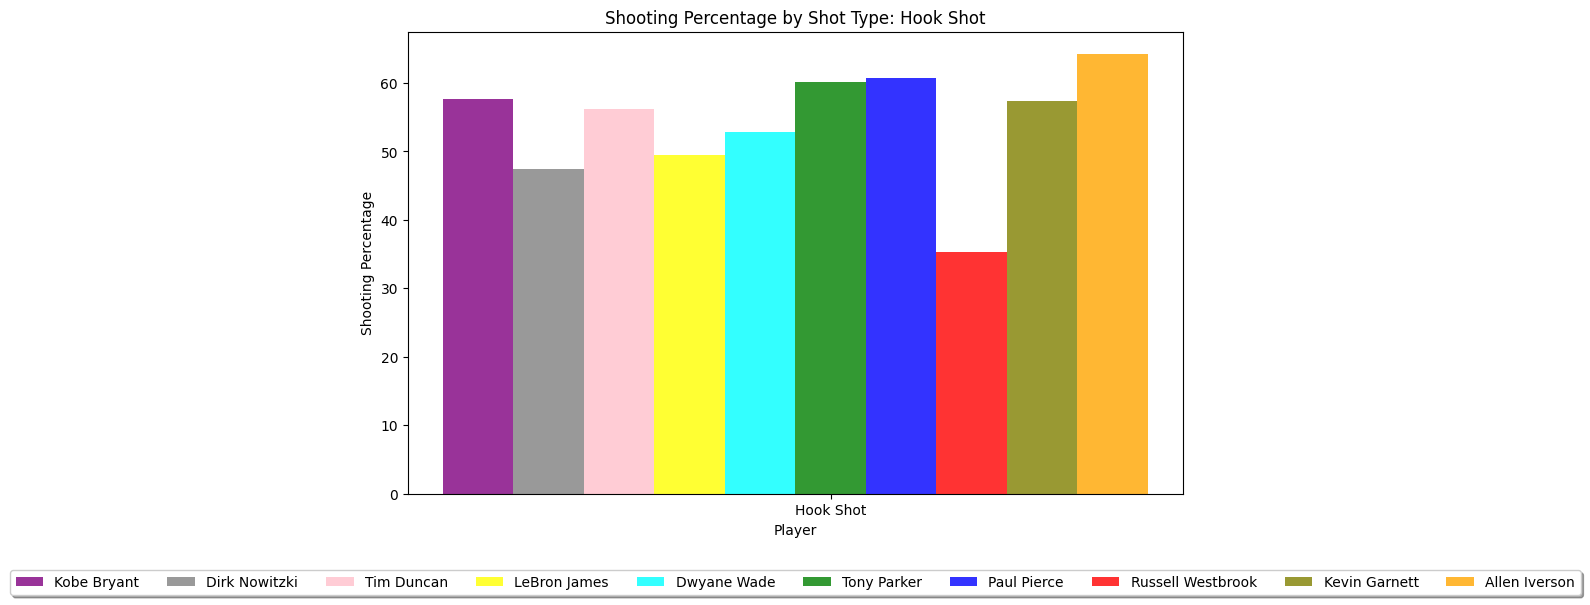

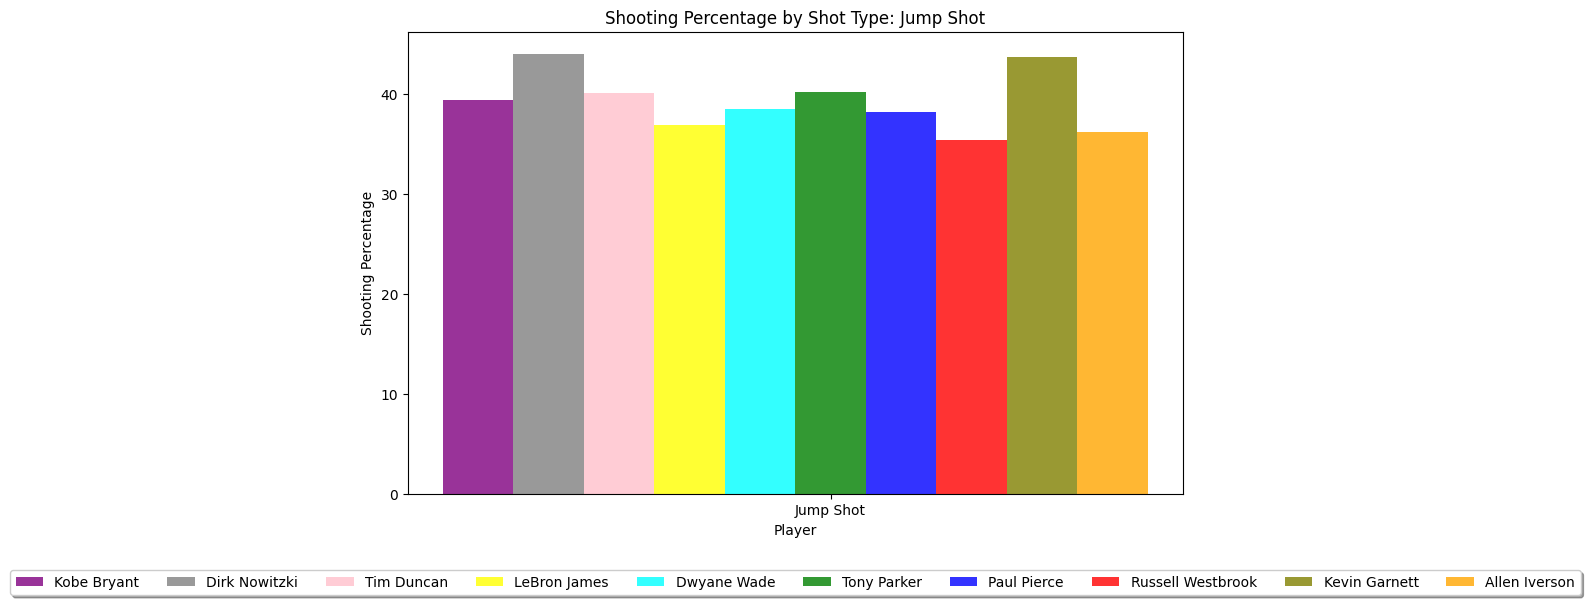

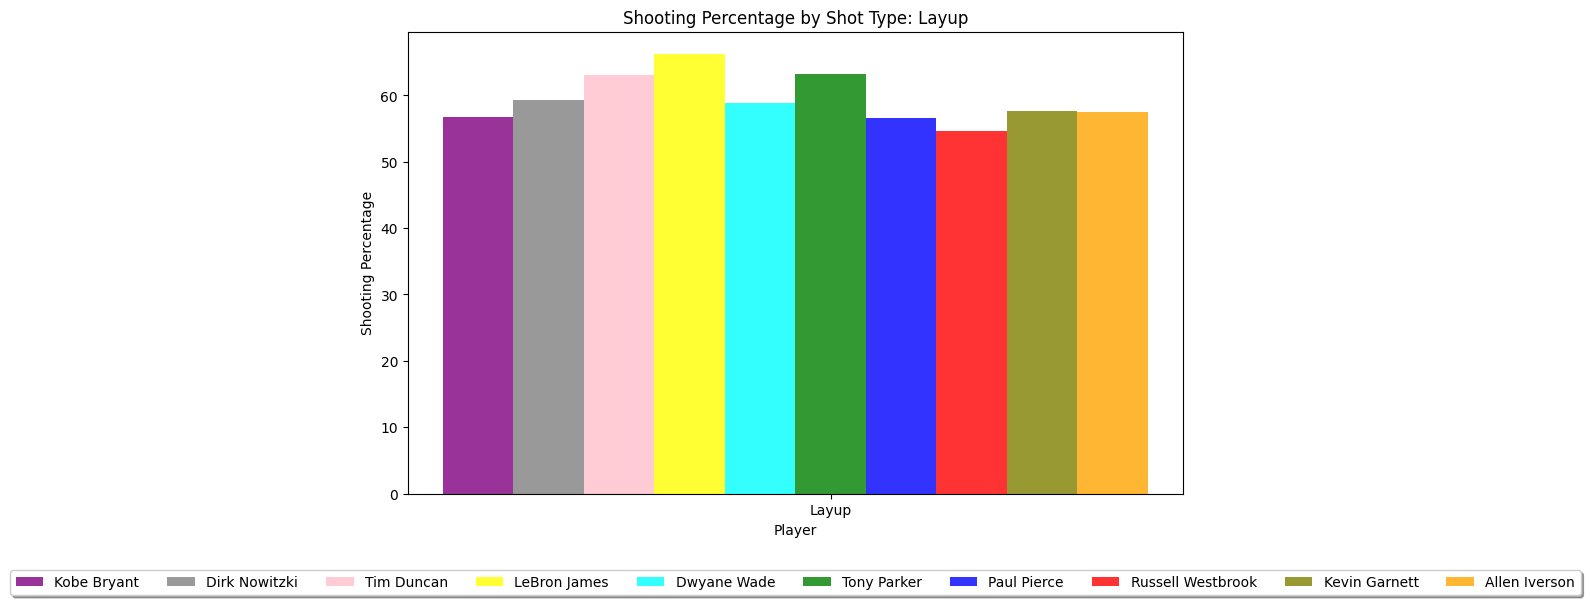

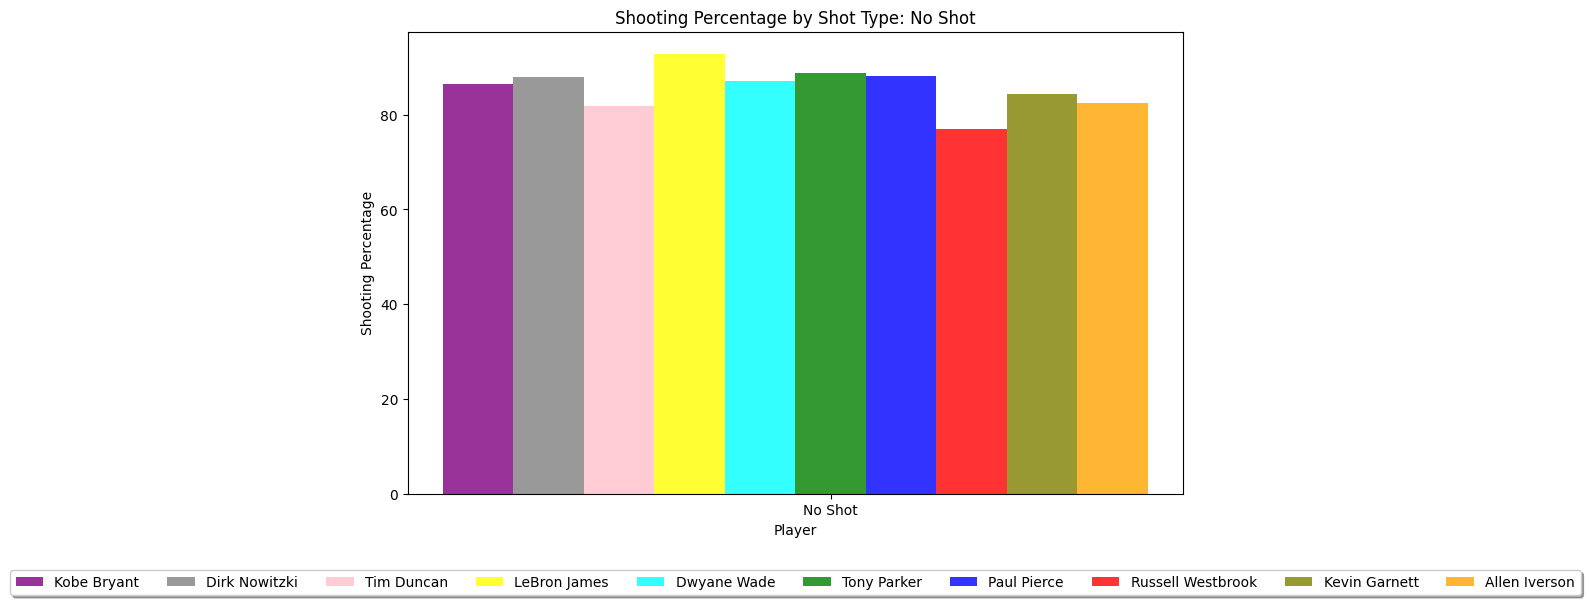

In [17]:
player_team_shots_made = df.groupby(['Player Name', 'Team Name']).agg({'Shot Made Flag': 'sum'}).reset_index()
player_team_shots_made = player_team_shots_made.sort_values(by='Shot Made Flag', ascending=False)
top_players = player_team_shots_made['Player Name'].tolist()[:10]
player_data = df[df['Player Name'].isin(top_players)]

player_summary = player_data.groupby(['Player Name', 'Action Type']).agg({'Shot Distance': 'count', 'Shot Made Flag': 'sum'}).reset_index()
player_summary.columns = ['Player Name', 'Shot Type', 'Shots Attempted', 'Shots Made']
player_summary['Shooting Percentage'] = player_summary['Shots Made'] / player_summary['Shots Attempted'] * 100
player_shot_summary = player_summary.groupby(['Player Name', 'Shot Type']).mean().reset_index()

for shot_type in player_shot_summary['Shot Type'].unique():
    shot_type_data = player_shot_summary[player_shot_summary['Shot Type'] == shot_type]
    pivot_table = shot_type_data.pivot(index='Player Name', columns='Shot Type', values='Shooting Percentage')

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.1
    opacity = 0.8

    colors = ['purple', 'gray','pink','yellow','cyan','green','blue','red','olive','orange']

    for i, player in enumerate(top_players):
        x = np.arange(len(pivot_table.columns))
        y = pivot_table.loc[player].values
        ax.bar(x + (i * bar_width), y, bar_width, alpha=opacity, color=colors[i], label=player)

    ax.set_title(f'Shooting Percentage by Shot Type: {shot_type}')
    ax.set_xlabel('Player')
    ax.set_ylabel('Shooting Percentage')
    ax.set_xticks(x + (len(top_players) / 2) * bar_width)
    ax.set_xticklabels(pivot_table.columns)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(top_players))

    plt.show()

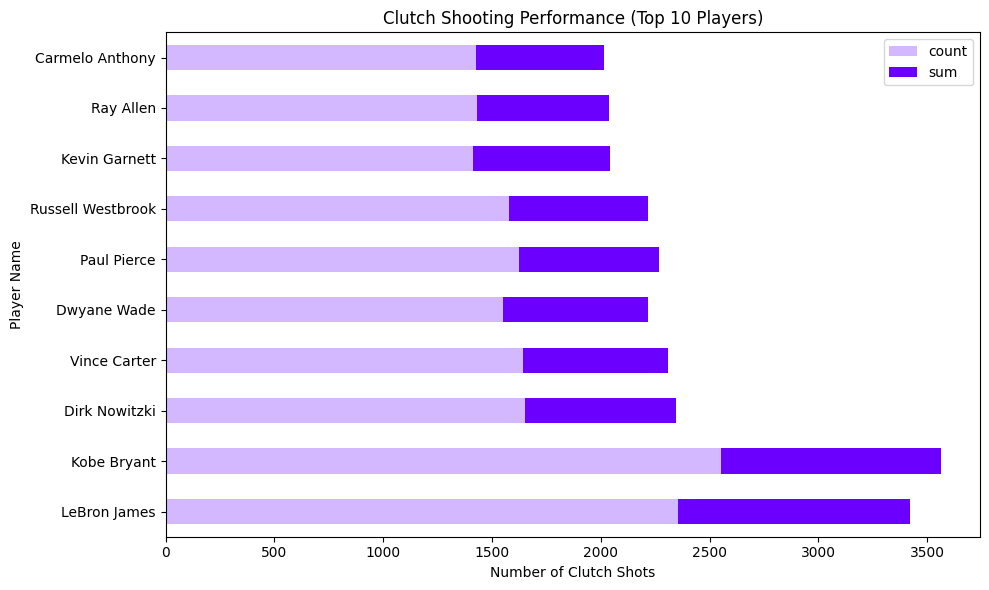

In [18]:
custom_cmap = ListedColormap(['#D3B8FF', '#6B00FF'])

df['Clutch Time'] = ((df['Minutes Remaining'] <= 2) & (df['Period'] >= 4) & (abs(df['Shot Made Flag']) <= 5))
clutch_shots = df[df['Clutch Time'] == True]

player_stats = clutch_shots.groupby(['Player Name'])[['Shot Made Flag']].agg(['count', 'sum'])
player_stats.columns = player_stats.columns.droplevel()

player_stats = player_stats.sort_values(by='sum', ascending=False)

top_players = player_stats.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_players.plot(kind='barh', stacked=True, ax=ax, colormap=custom_cmap)
ax.set_xlabel('Number of Clutch Shots')
ax.set_ylabel('Player Name')
ax.set_title('Clutch Shooting Performance (Top 10 Players)')
plt.tight_layout()
plt.show()

<ipython-input-19-779376954148>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


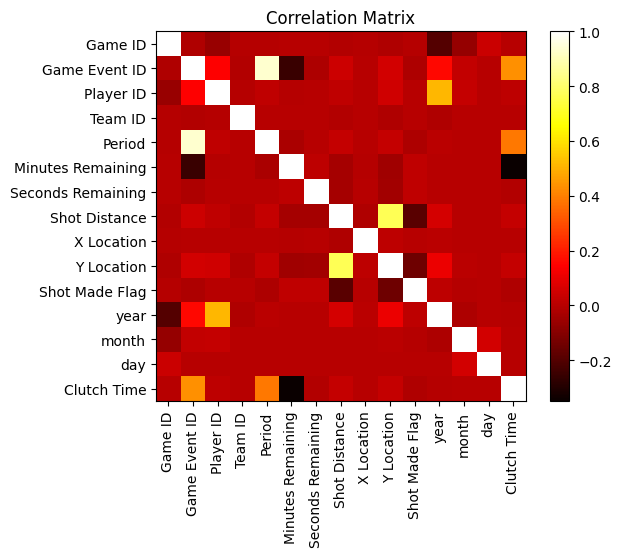

In [19]:
corr_matrix = df.corr()

plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

<ipython-input-20-6757e13e0cbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Playoff Game'] = np.where(player_data['Season Type'] == 'Playoffs', 1, 0)
<ipython-input-20-6757e13e0cbc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['Shooting Efficiency'] = player_data.groupby(['Player Name', 'Playoff Game'])['Shot Made Flag'].transform('mean')


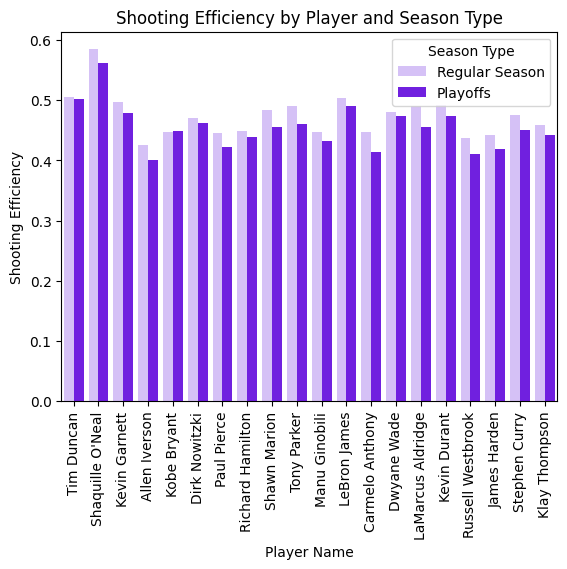

In [20]:
custom_cmap = ['#D3B8FF', '#6B00FF']

top_players = player_team_shots_made['Player Name'].tolist()[:20]
player_data = df[df['Player Name'].isin(top_players)]
player_data['Playoff Game'] = np.where(player_data['Season Type'] == 'Playoffs', 1, 0)
# Calculate shooting efficiency for each player and season type
player_data['Shooting Efficiency'] = player_data.groupby(['Player Name', 'Playoff Game'])['Shot Made Flag'].transform('mean')

# Create a bar chart of shooting efficiency by player and season type
sns.barplot(x='Player Name', y='Shooting Efficiency', hue='Season Type', data=player_data, palette=custom_cmap)
plt.title('Shooting Efficiency by Player and Season Type')
plt.xticks(rotation=90)
plt.show()

In [21]:
team_mappings = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHH",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Seattle SuperSonics": "SEA",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS",
    "Vancouver Grizzlies": "VAN",
    "New Jersey Nets": "NJN",
    "New Orleans Hornets": "NOH",
    "Charlotte Bobcats": "CHA",
    "New Orleans/Oklahoma City Hornets": "NOK"
}

df['Team Name'] = df['Team Name'].replace(team_mappings)
df['Shot Made'] = df['Shot Made Flag'].astype(bool)
df['Shot Location'] = df.apply(lambda row: 'Home' if row['Home Team'] == row['Team Name'] else 'Away', axis=1)

In [22]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Game Date,Home Team,Away Team,Season Type,year,month,day,Clutch Time,Shot Made,Shot Location
0,29700427,389,100,Tim Legler,1610612764,WAS,4,11,22,Jump Shot,...,1998-01-02,WAS,IND,Regular Season,1998,1,2,False,True,Home
1,29700427,406,100,Tim Legler,1610612764,WAS,4,9,36,Jump Shot,...,1998-01-02,WAS,IND,Regular Season,1998,1,2,False,False,Home
2,29700427,475,100,Tim Legler,1610612764,WAS,4,3,7,Jump Shot,...,1998-01-02,WAS,IND,Regular Season,1998,1,2,False,False,Home
3,29700427,487,100,Tim Legler,1610612764,WAS,4,1,45,Jump Shot,...,1998-01-02,WAS,IND,Regular Season,1998,1,2,True,False,Home
4,29700427,497,100,Tim Legler,1610612764,WAS,4,0,45,Jump Shot,...,1998-01-02,WAS,IND,Regular Season,1998,1,2,True,False,Home


**Home vs Away**

Plot showing the shooting percentage of all teams when playing as the Home Team vs Away Team

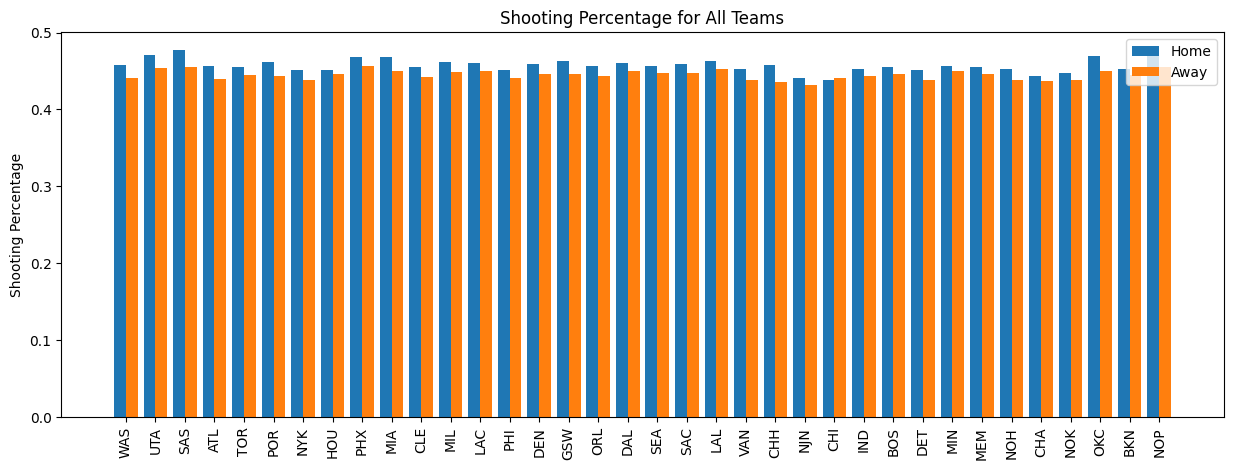

In [23]:
def plot_shooting_percentage_all_teams(data):
    # Create an empty dictionary to store the shooting percentages for each team
    shooting_pct_dict = {}

    # Loop over all the teams in the dataset
    for team_name in data['Team Name'].unique():
        # Subset the data to include only the rows for the current team
        team_data = data[data['Team Name'] == team_name]

        # Compute the shooting percentage for home games
        home_shots = team_data[team_data['Home Team'] == team_name]
        home_made = home_shots['Shot Made Flag'].sum()
        home_total = len(home_shots)
        home_pct = home_made / home_total

        # Compute the shooting percentage for away games
        away_shots = team_data[team_data['Away Team'] == team_name]
        away_made = away_shots['Shot Made Flag'].sum()
        away_total = len(away_shots)
        away_pct = away_made / away_total

        # Store the shooting percentages for the current team in the dictionary
        shooting_pct_dict[team_name] = (home_pct, away_pct)

    # Create a bar chart of the shooting percentages for all teams
    fig, ax = plt.subplots(figsize=(15, 5))
    x = range(len(shooting_pct_dict))
    ax.bar(x, [pct[0] for pct in shooting_pct_dict.values()], width=0.4, label='Home')
    ax.bar([i + 0.4 for i in x], [pct[1] for pct in shooting_pct_dict.values()], width=0.4, label='Away')
    ax.set_title('Shooting Percentage for All Teams')
    ax.set_ylabel('Shooting Percentage')
    ax.set_xticks([i + 0.2 for i in x])
    ax.set_xticklabels(shooting_pct_dict.keys())
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()
    
plot_shooting_percentage_all_teams(df)

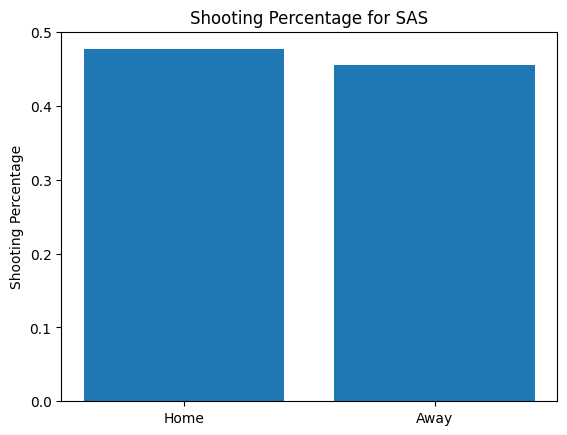

In [24]:
def plot_shooting_percentage(team_name, data):
    # Subset the data to include only the rows for the specified team
    team_data = data[(data['Team Name'] == team_name)]
    
    # Compute the shooting percentage for home games
    home_shots = team_data[team_data['Shot Location'] == 'Home']
    home_made = home_shots['Shot Made'].sum()
    home_total = len(home_shots)
    home_pct = home_made / home_total

    # Compute the shooting percentage for away games
    away_shots = team_data[team_data['Shot Location'] == 'Away']
    away_made = away_shots['Shot Made'].sum()
    away_total = len(away_shots)
    away_pct = away_made / away_total

    # Create a bar chart of the shooting percentages
    fig, ax = plt.subplots()
    ax.bar(['Home', 'Away'], [home_pct, away_pct])
    ax.set_title(f'Shooting Percentage for {team_name}')
    ax.set_ylabel('Shooting Percentage')
    plt.show()

plot_shooting_percentage('SAS', df)

In [25]:
def get_top_shooters(team_name, data):
    team_data = data[data['Team Name'] == team_name]
    # Subset the data to include only the rows for the current team
    team_data = data[data['Team Name'] == team_name]

    # Subset the data to include only successful shots
    successful_shots = team_data[team_data['Shot Made Flag'] == 1]

    # Compute the shooting percentage for home games
    home_shots = successful_shots[successful_shots['Home Team'] == team_name]
    home_pct = len(home_shots) / len(successful_shots)

    # Compute the shooting percentage for away games
    away_shots = successful_shots[successful_shots['Away Team'] == team_name]
    away_pct = len(away_shots) / len(successful_shots)

    # Get the top 5 shooters in home games
    top_home_shooters = home_shots.groupby('Player Name')['Shot Made Flag'].count().sort_values(ascending=False).head(5)

    # Get the top 5 shooters in away games
    top_away_shooters = away_shots.groupby('Player Name')['Shot Made Flag'].count().sort_values(ascending=False).head(5)
    
    return top_home_shooters, top_away_shooters

Get the top 5 shooters in any team when played at Home vs Away

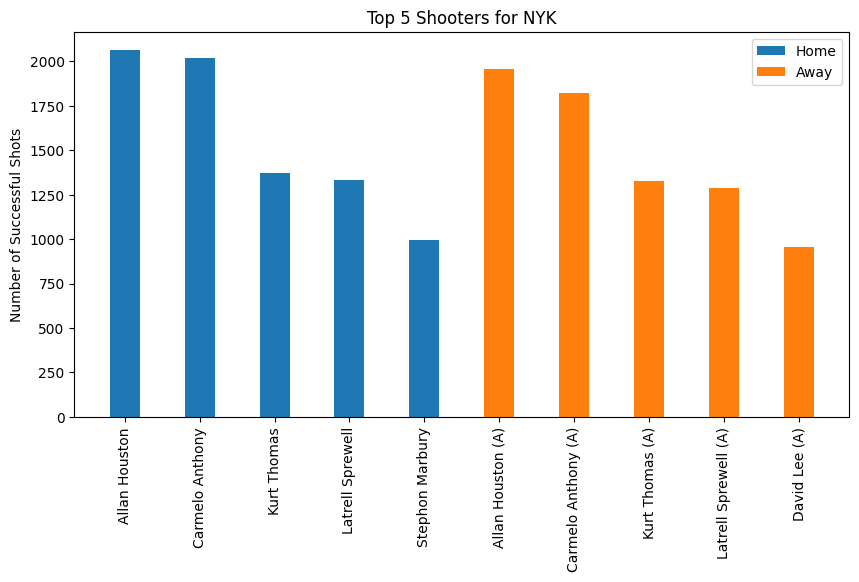

In [26]:
def plot_top_shooters(team_name, data):
    
    top_home_shooters, top_away_shooters = get_top_shooters(team_name, data)
    
    # Create a bar chart of the top shooters
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(top_home_shooters.index, top_home_shooters, width=0.4, label='Home')
    ax.bar([name + ' (A)' for name in top_away_shooters.index], top_away_shooters, width=0.4, label='Away')
    ax.set_title(f'Top 5 Shooters for {team_name}')
    ax.set_ylabel('Number of Successful Shots')
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()
    
plot_top_shooters('NYK', df)

In [27]:
def top_5_good_and_role_players(team_name, data):
    top_home, top_away = get_top_shooters(team_name, data)
    
    top_home_names = set(top_home.index)
    top_away_names = set(top_away.index)
    
    good_players = top_home_names.intersection(top_away_names)
    role_home_players = top_home_names.difference(top_away_names)
    role_away_players = top_away_names.difference(top_home_names)
    
    print("\033[1mTeam Name: \033[0m", team_name)
    print("\033[1mGood Shooters (Top shooters at both home and away locations):\033[0m", good_players)
    print("\033[1mHome Role Shooters (Top shooters at only the home locations):\033[0m", role_home_players)
    print("\033[1mAway Role Shooters (Top shooters at only the away locations):\033[0m", role_away_players)
    
top_5_good_and_role_players('NYK', df)
            
        

Team Name:  NYK
Good Shooters (Top shooters at both home and away locations): {'Kurt Thomas', 'Allan Houston', 'Carmelo Anthony', 'Latrell Sprewell'}
Home Role Shooters (Top shooters at only the home locations): {'Stephon Marbury'}
Away Role Shooters (Top shooters at only the away locations): {'David Lee'}


Coach analysis


In [ ]:
fn = 'NBA_head_coaches.csv'
coachdata = pd.read_csv(fn)

In [ ]:
coachdata.head()

In [ ]:
coachdata.info()

In [ ]:
df['Game Date'] = pd.to_datetime(df['Game Date'].astype(str), format='%Y%m%d')
df['Game Date'] = df['Game Date'].apply(lambda x: x.replace(year=1) if x.year == 1 else x)

In [ ]:
def get_coach_effect(coach_name, coach_df, shots_df):
    start_year = str(coach_df.loc[coach_df['Name'] == coach_name, 'Start season short'].iloc[0])
    end_year = coach_df.loc[coach_df['Name'] == coach_name, 'End season short'].iloc[0]
    start_date = pd.to_datetime(start_year + '0101', format='%Y%m%d')
    end_date = pd.to_datetime(end_year + '1231', format='%Y%m%d')
    coach_shots_df = shots_df[(shots_df['Game Date'] >= start_date) & (shots_df['Game Date'] <= end_date)]
    coach_teams = coach_df.loc[coach_df['Name'] == coach_name, 'Teams'].iloc[0].split(', ')
    coach_shots_df = coach_shots_df[coach_shots_df['Team Name'].isin(coach_teams)]
    
    for team in coach_teams:
        team_shots_df = coach_shots_df.loc[coach_shots_df['Team Name'] == team]
        team_shots_df = team_shots_df[team_shots_df['Shot Made'] == True]
        sns.jointplot(data=team_shots_df, x='X Location', y='Y Location', kind='scatter', space=0, alpha=0.5, height=10)
        
        img = plt.imread('full-court.jpeg')
        plt.imshow(img, extent=[-250, 250, -70.5, 800])
        plt.xlim(-250, 250)
        plt.ylim(800, -70.5)
        plt.title(f'{team} Shot Chart')
        plt.show()
    
get_coach_effect("Danny Ainge", coachdata, df)

Defending Shots Based on Shot Type


In [28]:
defense_df = df.groupby(['Team Name', 'Shot Zone Area', 'Shot Type'])['Shot Made Flag'].mean().reset_index()

In [29]:
# Pivot the table to make the Shot type as the columns and teams as the rows
pivot_table = pd.pivot_table(data=defense_df, index='Team Name', columns='Shot Type', values='Shot Made Flag')

<Axes: xlabel='Shot Type', ylabel='Team Name'>

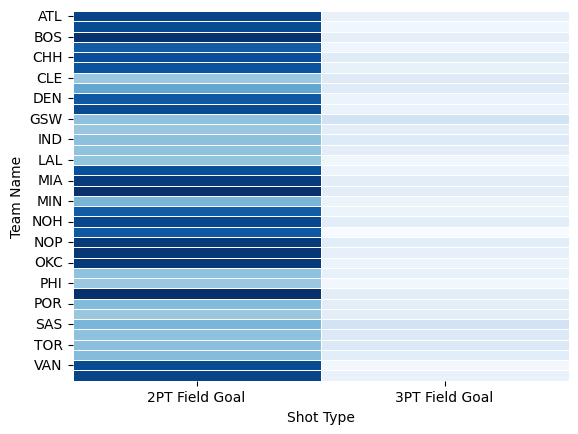

In [30]:
sns.heatmap(data=pivot_table, cmap='Blues',  fmt='.0f', linewidths=0.5, cbar=False)

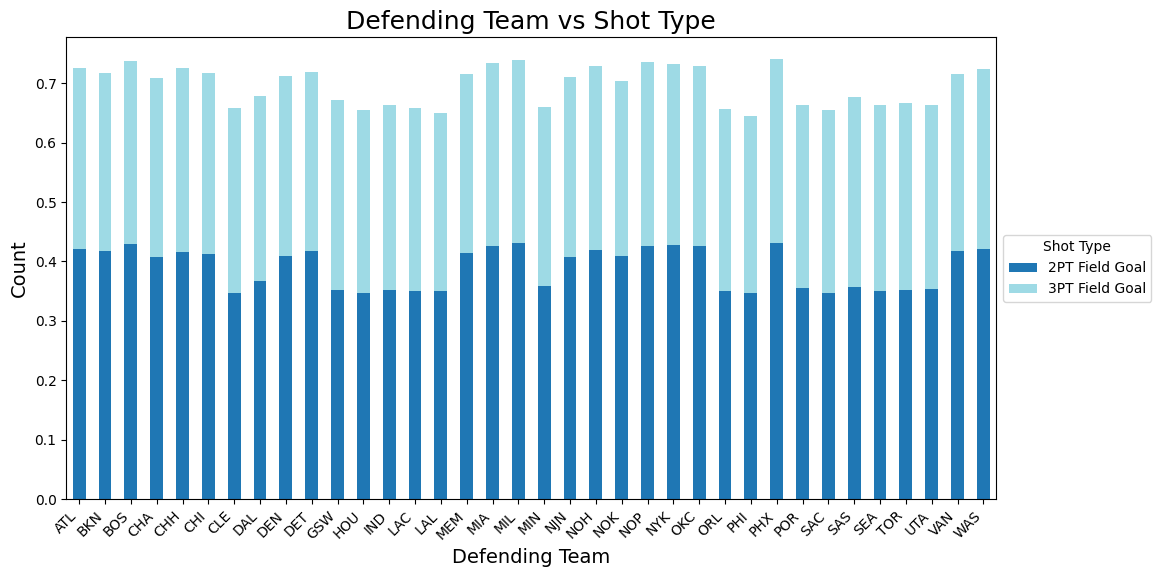

In [31]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Defending Team vs Shot Type', fontsize=18)
plt.xlabel('Defending Team', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Shot Type')
plt.show()

In [32]:
# Pivot the table to make the Shot type as the columns and teams as the rows
pivot_table_all = pd.pivot_table(data=defense_df, index='Team Name', columns=['Shot Zone Area', 'Shot Type'], values='Shot Made Flag')

<Axes: xlabel='Shot Zone Area-Shot Type', ylabel='Team Name'>

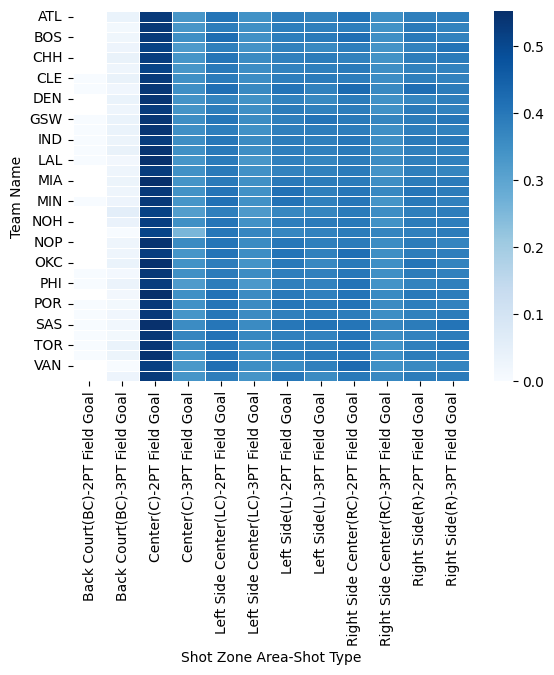

In [33]:
# create a heatmap
sns.heatmap(data=pivot_table_all, cmap='Blues',  fmt='.0f', linewidths=.5, cbar=True)

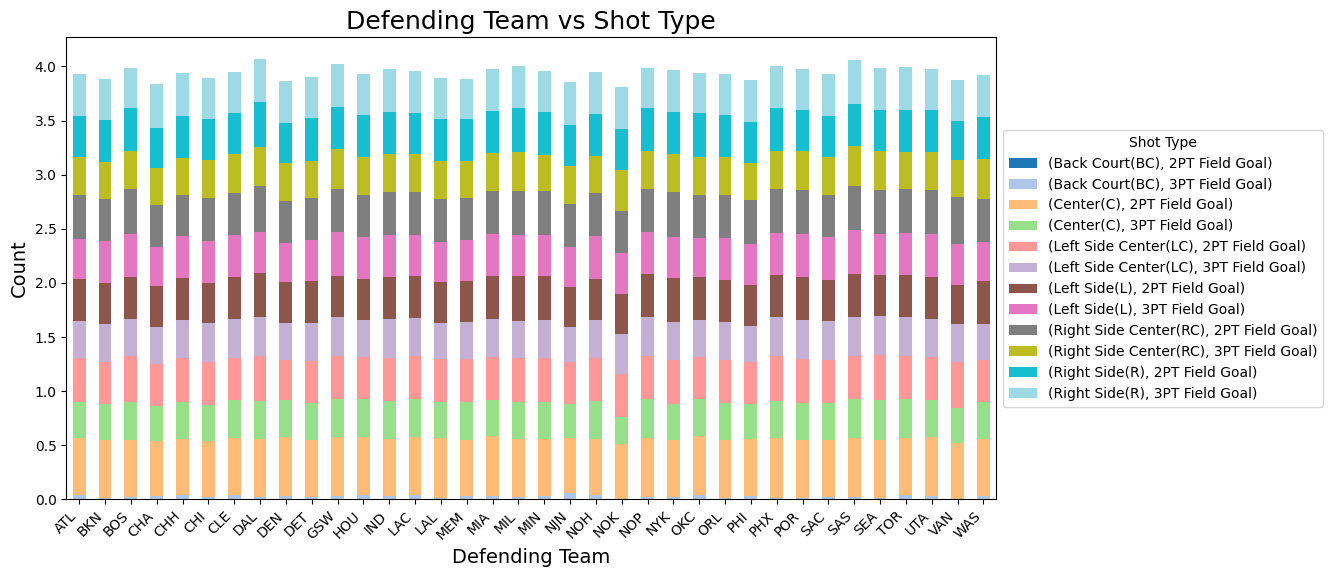

In [34]:
pivot_table_all.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Defending Team vs Shot Type', fontsize=18)
plt.xlabel('Defending Team', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Shot Type')
plt.show()

In [35]:
teams = df['Team Name'].unique()
teams

array(['WAS', 'UTA', 'SAS', 'ATL', 'TOR', 'POR', 'NYK', 'HOU', 'PHX',
       'MIA', 'CLE', 'MIL', 'LAC', 'PHI', 'DEN', 'GSW', 'ORL', 'DAL',
       'SEA', 'SAC', 'LAL', 'VAN', 'CHH', 'NJN', 'CHI', 'IND', 'BOS',
       'DET', 'MIN', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'],
      dtype=object)

In [36]:
# Calculate total 3-point attempts
three_point_attempts = df.groupby(['Season Type', 'Team Name']).apply(lambda x: x[x['Shot Type'] == '3PT Field Goal'].shape[0]).reset_index(name='3PA')
three_point_attempts

,Season Type,Team Name,3PA
0,Playoffs,ATL,2197
1,Playoffs,BKN,722
2,Playoffs,BOS,4224
3,Playoffs,CHA,153
4,Playoffs,CHH,520
...,...,...,...
65,Regular Season,SEA,15612
66,Regular Season,TOR,36132
67,Regular Season,UTA,29539
68,Regular Season,VAN,3196


In [37]:
# Calculate 3-point shooting percentage
three_point_makes = df[df['Shot Type'] == '3PT Field Goal'].groupby(['Season Type', 'Team Name']).size().reset_index(name='3PM')
three_point_accuracy = pd.merge(three_point_attempts, three_point_makes, on=['Season Type', 'Team Name'])
three_point_accuracy['3P%'] = three_point_accuracy['3PM'] / three_point_accuracy['3PA']
three_point_accuracy

,Season Type,Team Name,3PA,3PM,3P%
0,Playoffs,ATL,2197,2197,1.0
1,Playoffs,BKN,722,722,1.0
2,Playoffs,BOS,4224,4224,1.0
3,Playoffs,CHA,153,153,1.0
4,Playoffs,CHH,520,520,1.0
...,...,...,...,...,...
65,Regular Season,SEA,15612,15612,1.0
66,Regular Season,TOR,36132,36132,1.0
67,Regular Season,UTA,29539,29539,1.0
68,Regular Season,VAN,3196,3196,1.0


In [38]:
# Calculate total games played
total_games = df.groupby(['Season Type', 'Team Name']).agg({'Game ID': 'nunique'}).reset_index()
total_games.rename(columns={'Game ID': 'GP'}, inplace=True)
total_games

,Season Type,Team Name,GP
0,Playoffs,ATL,105
1,Playoffs,BKN,30
2,Playoffs,BOS,192
3,Playoffs,CHA,8
4,Playoffs,CHH,39
...,...,...,...
65,Regular Season,SEA,870
66,Regular Season,TOR,1820
67,Regular Season,UTA,1820
68,Regular Season,VAN,296


In [39]:
# Calculate number of wins
wins = df[df['Shot Made Flag'] == 1].groupby(['Season Type', 'Team Name']).agg({'Game ID': 'nunique'}).reset_index()
wins.rename(columns={'Game ID': 'W'}, inplace=True)
wins

,Season Type,Team Name,W
0,Playoffs,ATL,105
1,Playoffs,BKN,30
2,Playoffs,BOS,192
3,Playoffs,CHA,8
4,Playoffs,CHH,39
...,...,...,...
65,Regular Season,SEA,870
66,Regular Season,TOR,1820
67,Regular Season,UTA,1820
68,Regular Season,VAN,296


In [40]:
# Calculate winning percentage
winning_percentage = pd.merge(total_games, wins, on=['Season Type', 'Team Name'])
winning_percentage['WIN%'] = winning_percentage['W'] / winning_percentage['GP']
winning_percentage

,Season Type,Team Name,GP,W,WIN%
0,Playoffs,ATL,105,105,1.0
1,Playoffs,BKN,30,30,1.0
2,Playoffs,BOS,192,192,1.0
3,Playoffs,CHA,8,8,1.0
4,Playoffs,CHH,39,39,1.0
...,...,...,...,...,...
65,Regular Season,SEA,870,870,1.0
66,Regular Season,TOR,1820,1820,1.0
67,Regular Season,UTA,1820,1820,1.0
68,Regular Season,VAN,296,296,1.0


In [41]:
# Merge dataframes
df_merged = pd.merge(three_point_accuracy, winning_percentage, on=['Season Type', 'Team Name'])
df_merged

,Season Type,Team Name,3PA,3PM,3P%,GP,W,WIN%
0,Playoffs,ATL,2197,2197,1.0,105,105,1.0
1,Playoffs,BKN,722,722,1.0,30,30,1.0
2,Playoffs,BOS,4224,4224,1.0,192,192,1.0
3,Playoffs,CHA,153,153,1.0,8,8,1.0
4,Playoffs,CHH,520,520,1.0,39,39,1.0
...,...,...,...,...,...,...,...,...
65,Regular Season,SEA,15612,15612,1.0,870,870,1.0
66,Regular Season,TOR,36132,36132,1.0,1820,1820,1.0
67,Regular Season,UTA,29539,29539,1.0,1820,1820,1.0
68,Regular Season,VAN,3196,3196,1.0,296,296,1.0


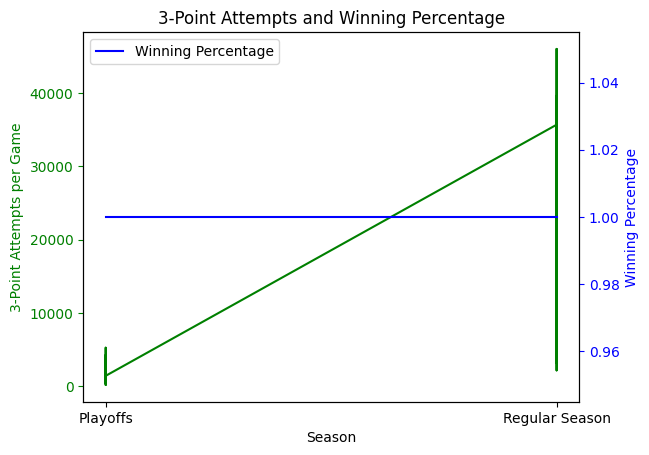

In [42]:
# Create line chart with two y-axes
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_merged['Season Type'], df_merged['3PA'], 'g-', label='3-Point Attempts per Game')
ax2.plot(df_merged['Season Type'], df_merged['WIN%'], 'b-', label='Winning Percentage')

ax1.set_xlabel('Season')
ax1.set_ylabel('3-Point Attempts per Game', color='g')
ax2.set_ylabel('Winning Percentage', color='b')

ax1.tick_params(axis='y', colors='g')
ax2.tick_params(axis='y', colors='b')

plt.title('3-Point Attempts and Winning Percentage')
plt.legend(loc='upper left')
plt.show()

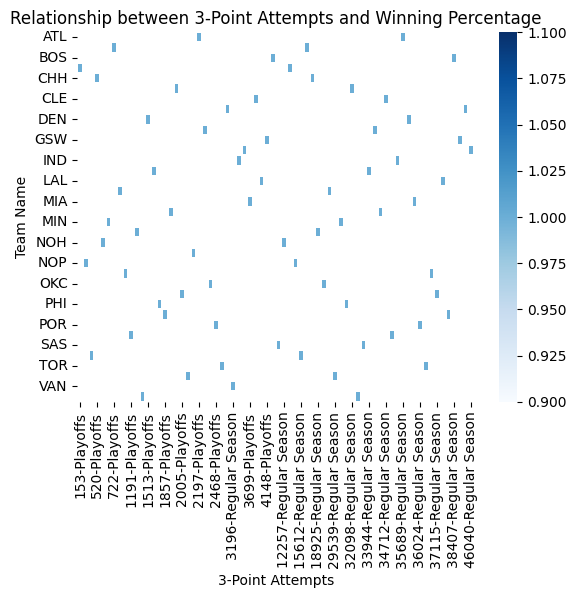

In [43]:
# Create a pivot table with 3-point attempts and winning percentage
pivot_table = pd.pivot_table(data= df_merged, values='WIN%', index='Team Name', columns=['3PA', 'Season Type'])

# Create a heatmap of the pivot table
sns.heatmap(data= pivot_table, cmap='Blues',  fmt='.0f', linewidths=0.2, cbar=True)
plt.xlabel('3-Point Attempts')
plt.ylabel('Team Name')
plt.title('Relationship between 3-Point Attempts and Winning Percentage')
plt.show()

In [44]:
# Calculate on-court shooting efficiency for each player
player_fg = df.groupby(['Season Type', 'Player Name']).agg({'Shot Made Flag': 'mean'}).reset_index()
player_fg.rename(columns={'Shot Made Flag': 'FG%'}, inplace=True)
player_fg

,Season Type,Player Name,FG%
0,Playoffs,A.C. Green,0.408602
1,Playoffs,AJ Price,0.378378
2,Playoffs,Aaron Brooks,0.415541
3,Playoffs,Aaron Gordon,0.467742
4,Playoffs,Aaron Gray,0.600000
...,...,...,...
3327,Regular Season,Zion Williamson,0.589041
3328,Regular Season,Zoran Dragic,0.366667
3329,Regular Season,Zoran Planinic,0.405350
3330,Regular Season,Zydrunas Ilgauskas,0.475797


In [45]:
# Calculate team shooting efficiency while each player is on the court
team_fg = df.groupby(['Season Type', 'Player Name']).apply(lambda x: x[x['Player Name'] == x['Player Name'].unique()[0]]['Shot Made Flag'].mean()).reset_index(name='Team FG%')
team_fg

,Season Type,Player Name,Team FG%
0,Playoffs,A.C. Green,0.408602
1,Playoffs,AJ Price,0.378378
2,Playoffs,Aaron Brooks,0.415541
3,Playoffs,Aaron Gordon,0.467742
4,Playoffs,Aaron Gray,0.600000
...,...,...,...
3327,Regular Season,Zion Williamson,0.589041
3328,Regular Season,Zoran Dragic,0.366667
3329,Regular Season,Zoran Planinic,0.405350
3330,Regular Season,Zydrunas Ilgauskas,0.475797


In [46]:
# Merge dataframes
player_team_fg = pd.merge(player_fg, team_fg, on=['Season Type', 'Player Name'])

player_team_fg

,Season Type,Player Name,FG%,Team FG%
0,Playoffs,A.C. Green,0.408602,0.408602
1,Playoffs,AJ Price,0.378378,0.378378
2,Playoffs,Aaron Brooks,0.415541,0.415541
3,Playoffs,Aaron Gordon,0.467742,0.467742
4,Playoffs,Aaron Gray,0.600000,0.600000
...,...,...,...,...
3327,Regular Season,Zion Williamson,0.589041,0.589041
3328,Regular Season,Zoran Dragic,0.366667,0.366667
3329,Regular Season,Zoran Planinic,0.405350,0.405350
3330,Regular Season,Zydrunas Ilgauskas,0.475797,0.475797


In [47]:
# Calculate correlation
correlation = player_team_fg['FG%'].corr(player_team_fg['Team FG%'])
print("Correlation between player's on-court shooting efficiency and team's overall shooting efficiency:", correlation)

Correlation between player's on-court shooting efficiency and team's overall shooting efficiency: 1.0


CLUSTERING MODEL

In [48]:
three_point_shots = df[df['Shot Type'] == '3PT Field Goal']

In [49]:
player_stats = three_point_shots.groupby('Player Name').agg(
    shooting_percentage=('Shot Made Flag', 'mean'),
    total_attempts=('Game ID', 'count'),
    avg_shot_distance=('Shot Distance', 'mean')
).reset_index()

In [50]:
player_stats.head()

,Player Name,shooting_percentage,total_attempts,avg_shot_distance
0,A.C. Green,0.045455,22,33.545455
1,A.J. Guyton,0.375000,192,25.171875
2,AJ Hammons,0.500000,10,23.800000
3,AJ Price,0.318697,706,25.430595
4,Aaron Brooks,0.367698,2328,25.721649


In [51]:
player_stats.describe()

,shooting_percentage,total_attempts,avg_shot_distance
count,1917.000000,1917.000000,1917.000000
mean,0.267691,586.075639,26.311453
std,0.146272,1045.323658,4.924854
min,0.000000,1.000000,22.000000
25%,0.200000,13.000000,24.462857
50%,0.314476,96.000000,24.936508
75%,0.357143,664.000000,25.641509
max,1.000000,8089.000000,84.000000


In [52]:
player_games = three_point_shots.groupby(['Player Name', 'Game ID']).size().reset_index(name='Attempts')
player_attempts_per_game = player_games.groupby('Player Name')['Attempts'].mean().reset_index()

In [53]:
player_attempts_per_game.describe()

,Attempts
count,1917.000000
mean,2.240827
std,1.223158
min,1.000000
25%,1.200000
50%,1.941176
75%,2.939210
max,8.557621


In [54]:
player_stats = pd.merge(player_stats, player_attempts_per_game, on='Player Name')

In [55]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(player_stats[['shooting_percentage', 'Attempts', 'avg_shot_distance']])

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

player_stats['cluster'] = clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
player_stats['cluster'] = clusters

# Create an interactive scatter plot using Plotly
fig = px.scatter(player_stats, x='shooting_percentage', y='Attempts', color='cluster',
                 hover_data=['Player Name'], color_continuous_scale='viridis', title='NBA Players Clustering Based on 3-Point Shooting')

fig.update_layout(xaxis_title='Shooting Percentage', yaxis_title='Attempts per Game')
fig.show()

In [57]:
df['Game Date'] = pd.to_datetime(df['Game Date'], format='%Y%m%d')
df['year'] = df['Game Date'].dt.year

In [58]:
def cluster_data(data, start_year, end_year):
    
    data_decade = data[(data['year'] >= start_year) & (data['year'] <= end_year)]

    three_point_shots = data_decade[data_decade['Shot Type'] == '3PT Field Goal']

    player_stats = three_point_shots.groupby('Player ID').agg(
        player_name=('Player Name', 'first'),
        shooting_percentage=('Shot Made Flag', 'mean'),
        total_attempts=('Game ID', 'count'),
        avg_shot_distance=('Shot Distance', 'mean')
    ).reset_index()

    player_games = three_point_shots.groupby(['Player ID', 'Game ID']).size().reset_index(name='Attempts')
    player_attempts_per_game = player_games.groupby('Player ID')['Attempts'].mean().reset_index()

    player_stats = pd.merge(player_stats, player_attempts_per_game, on='Player ID')

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(player_stats[['shooting_percentage', 'Attempts', 'avg_shot_distance']])

    kmeans = KMeans(n_clusters=6, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    player_stats['cluster'] = clusters

    return player_stats

In [59]:
df_1998_2004 = cluster_data(df, start_year=1998, end_year=2004)
df_2005_2012 = cluster_data(df, start_year=2005, end_year=2012)
df_2013_2020 = cluster_data(df, start_year=2013, end_year=2020)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [60]:
for idx, decade_data in enumerate([df_1998_2004, df_2005_2012, df_2013_2020], start=1):
    fig = px.scatter(decade_data, x='shooting_percentage', y='Attempts', color='cluster',
                     hover_data=['player_name'], color_continuous_scale='viridis',
                     title=f'NBA Players Clustering Based on 3-Point Shooting (Period {idx})')
    fig.update_layout(xaxis_title='Shooting Percentage', yaxis_title='Attempts per Game')
    fig.show()

In [61]:
clutch_time_shots = df[(df['Minutes Remaining'] <= 5) & (df['Period'] >= 4)]

In [62]:
clutch_shots = clutch_time_shots.groupby('Player ID').agg(
        player_name=('Player Name', 'first'),
        shooting_percentage=('Shot Made Flag', 'mean'),
        total_attempts=('Game ID', 'count'),
    ).reset_index()


clutch_shots = clutch_shots[clutch_shots['total_attempts'] >= 100]
clutch_shots.head()

,Player ID,player_name,shooting_percentage,total_attempts
0,3,Grant Long,0.417526,194
3,15,Eric Piatkowski,0.478088,502
4,17,Clyde Drexler,0.424460,139
5,21,Greg Anthony,0.411950,318
6,22,Rik Smits,0.491525,295


In [63]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clutch_shots[['shooting_percentage', 'total_attempts']])

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

clutch_shots['cluster'] = clusters

fig = px.scatter(clutch_shots, x='shooting_percentage', y='total_attempts', color='cluster',
                 hover_data=['player_name'], color_continuous_scale='viridis', title='NBA Players Clustering Based on Clutch shooting')

fig.update_layout(xaxis_title='Shooting Percentage', yaxis_title='Total Attempts')
fig.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

